In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


# Processing Function


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

def process_e_data(file_path):
    baseline = pd.read_csv('/home/phildo/Documents/Master DSAIT/Sustainable SE/SSE_EnergyMeasurement/linux_scripts/benchmark_results_sleep.csv')
    #calculate average of baseline
    baseline_avg = baseline['Energy (Joules)'].mean()
    print(f'The average energy consumption of the baseline is: {baseline_avg}')

    data = pd.read_csv(file_path)
    df = pd.DataFrame(data)

    # Calculate average power in a new column
    df['Average Power (Watts)'] = (df['Energy (Joules)'] - baseline_avg) / df[' Time (Seconds)']


    # Create the violin plot

    plt.figure(figsize=(8, 6))  # Adjust figure size if needed

    # Correcting the palette assignment issue
    sns.violinplot(x='Browser', y='Average Power (Watts)', hue='Browser', data=df, 
                inner="quartile", palette={"Firefox": "skyblue", "Chrome": "lightcoral"}, 
                legend=False)  # Disable default legend

    plt.title('Reddit Scrolling: Normalized Average Power by Browser')
    plt.xlabel('Browser')
    plt.ylabel('Average Power (Watts)')

    # Manually adding a legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor="skyblue", label="Firefox"),
            plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor="lightcoral", label="Chrome")]
    plt.legend(handles=handles, title='Browser')

    plt.show()



    #make distribution plot
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x='Average Power (Watts)', hue='Browser', kde=True, palette={"Firefox": "skyblue", "Chrome": "lightcoral"})
    plt.title('Reddit Scrolling: Normalized Average Power Distribution by Browser')
    plt.xlabel('Average Power (Watts)') # Corrected x-axis label
    plt.ylabel('Frequency')
    plt.legend(title = 'Browser', labels = ['Firefox', 'Chrome'])
    plt.show()

    #make a line plot of the average power consumption per iteration
    plt.figure(figsize=(12, 6))

    # Ensure correct palette assignment
    sns.lineplot(data=df, x='Iteration', y='Average Power (Watts)', hue='Browser', 
                palette={"Firefox": "skyblue", "Chrome": "lightcoral"}, marker='o')

    plt.title('Reddit Scrolling: Normalized Average Power by Browser per Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Average Power (Watts)')

        # Let seaborn handle the legend correctly
    plt.legend(title='Browser')

    plt.show()


    #t-test
    firefox = df[df['Browser'] == 'Firefox']['Average Power (Watts)']
    chrome = df[df['Browser'] == 'Chrome']['Average Power (Watts)']

    t_stat, p_val = ttest_ind(firefox, chrome)

    print(f'The p-value is: {p_val}')
    print(f'The t-statistic is: {t_stat}')
    #print averages
    print(f'The average power consumption of Firefox is: {firefox.mean()}')
    print(f'The average power consumption of Chrome is: {chrome.mean()}')

In [5]:
#Check how many instances of Firefox and Chrome are in the dataset
df = pd.read_csv('/home/phildo/Documents/Master DSAIT/Sustainable SE/SSE_EnergyMeasurement/linux_scripts/benchmark_results_youtube.csv')
print(df['Browser'].value_counts())

Browser
Firefox    30
Chrome     30
Name: count, dtype: int64


# Results


### YouTube Scrolling

The average energy consumption of the baseline is: 502.4601765950521


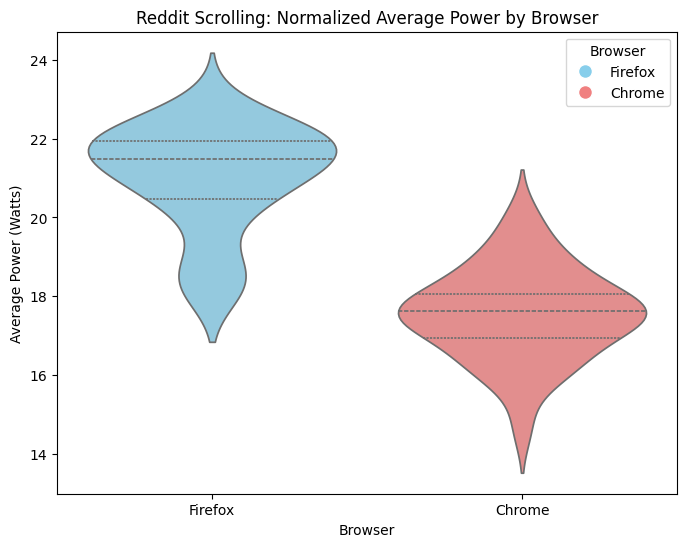

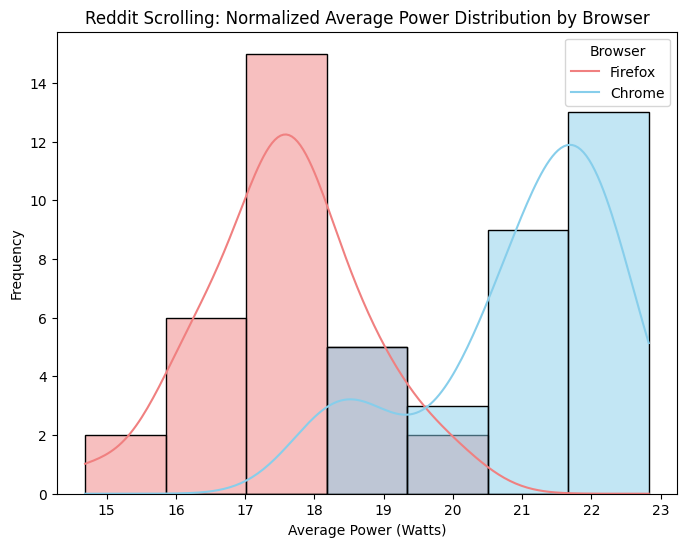

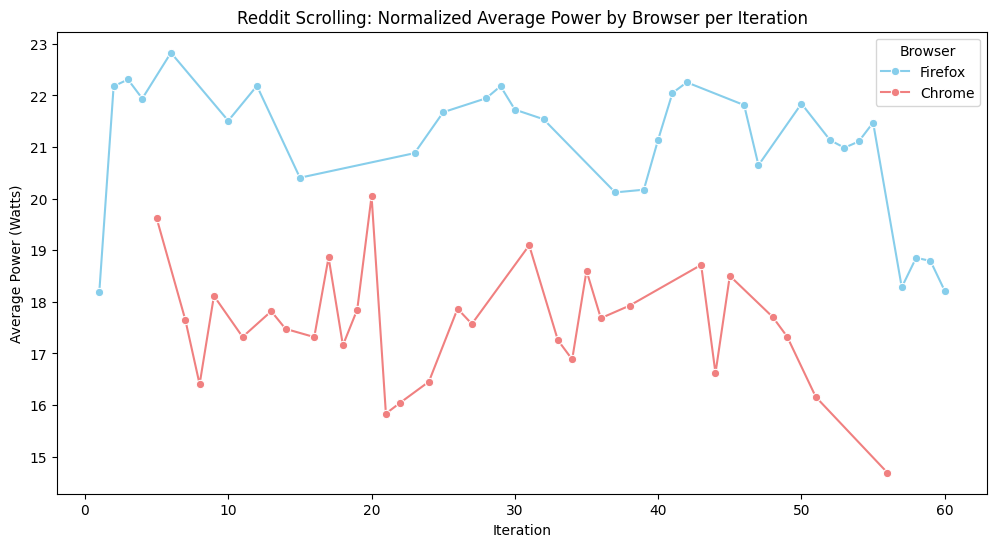

The p-value is: 1.8106701583174684e-15
The t-statistic is: 10.775734058354983
The average power consumption of Firefox is: 21.013596814502268
The average power consumption of Chrome is: 17.553285282556597


In [7]:

process_e_data('/home/phildo/Documents/Master DSAIT/Sustainable SE/SSE_EnergyMeasurement/linux_scripts/benchmark_results_reddit.csv')

### Reddit 